<a href="https://colab.research.google.com/github/PatrykCiwinski/Topic_modeling-LDA/blob/main/Topic_modeling(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LDA

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import textwrap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!gdown 1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4

Downloading...
From: https://drive.google.com/uc?id=1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4
To: /content/bbc_text_cls.csv
100% 5.09M/5.09M [00:00<00:00, 24.5MB/s]


In [4]:
df=pd.read_csv('bbc_text_cls.csv')

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
#stop-words
stop_words=set(stopwords.words('english'))
stop_words = stop_words.union({'said','would','could','told','also','new','year'})

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [35]:
df['cleaned_text']=df['text'].apply(clean_text)

In [36]:
vectorizer = CountVectorizer(max_features=1000)

In [37]:
X=vectorizer.fit_transform(df['cleaned_text'])

In [38]:
no_topics=df['labels'].nunique()

In [52]:
lda=LatentDirichletAllocation(n_components=no_topics,random_state=123)

In [53]:
Z = lda.fit_transform(X)

In [54]:
topics = lda.components_

In [55]:
# Print the topics with their terms
terms = vectorizer.get_feature_names_out()

for index, component in enumerate(topics):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['people', 'technology', 'mobile', 'phone', 'game', 'service', 'user']
Topic 2:  ['game', 'time', 'first', 'england', 'player', 'year', 'world']
Topic 3:  ['company', 'market', 'firm', 'sale', 'price', 'bank', 'growth']
Topic 4:  ['government', 'labour', 'party', 'election', 'people', 'minister', 'blair']
Topic 5:  ['film', 'best', 'award', 'music', 'show', 'star', 'year']


# We can forecast topics as follows:

Topic 1:tech,
Topic 2:sports,
Topic 3:business,
Topic 4:politics,
Topic 5:entertainment

In [59]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [60]:
i = np.random.choice(len(df))
z=Z[i]
topics=np.arange(5)+1

In [61]:
z_df = pd.DataFrame(z)
max_value = z_df.idxmax()

In [62]:
max_idx = max_value.tolist()

In [63]:
print(wrap(df.iloc[i]['cleaned_text']))

Brown name March Budget Chancellor Gordon Brown deliver Budget House
Commons March Treasury announced Budget likely last General Election
1230 Wednesday Prime Minister question time annual event chancellor
outline government taxation broader economic prediction Tories likely
Budget contain measure attract vote election expected Next month
Budget Brown ninth since Labour came power 1997 election called little
day Budget announcement date election shortened Finance Bill rushed
Parliament all-party support allow Government continue collecting
revenue full Finance Bill Budget measure returned Commons election
Labour secures another term office Tory shadow chancellor Oliver
Letwin sure thing Budget contain measure attract vote contain billion
rise independent expert inevitable Labour win election Brown announced
Budget date short ministerial statement accountancy firm Ernst Young
urged politics aside focus long-term requirement economy Budgets given
immediately last election tax incumbent c

In [64]:
pred_topics = {'Topic 1':'tech',
'Topic 2':'sports',
'Topic 3':'business',
'Topic 4':'politics',
'Topic 5':'entertainment'}

In [65]:
values = list(pred_topics.values())


Text(0.5, 1.0, 'True label: politics, pred_label: politics')

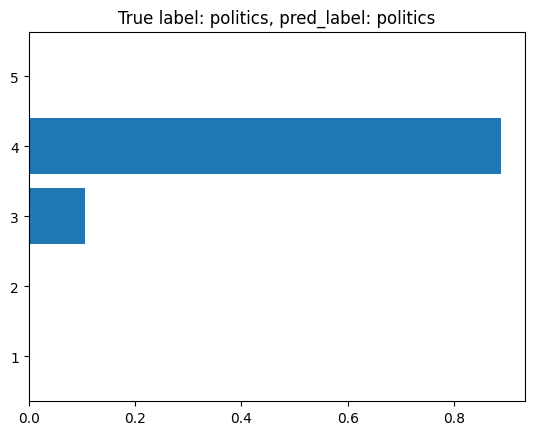

In [66]:
fig,ax= plt.subplots()
ax.barh(topics,z)
ax.set_title(f'True label: {df.iloc[i]["labels"]}, pred_label: {values[max_value[0]]}')